In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeConversion import secondsToHuman
%matplotlib inline

In [107]:
data = pd.read_csv('../../data/UW_Trip_Data_4mo_QC_capacity.csv')
broken = pd.read_csv('../../data/4mo_broken_buses.csv')

In [109]:
pd.to_datetime(data.ServiceDate)
data = data.set_index(data.ServiceDate)

In [110]:
dates = data.ServiceDate.drop_duplicates()
dates = dates.apply(lambda x: '2' + x[1:])
dates.index = range(len(dates))
dates.sort()
data.ServiceDate = data.ServiceDate.apply(lambda x: '2' + x[1:])

In [111]:
def AvTime(code):
    pickupTimes = data[(data.Activity == code) & (data.ETA < 86400)]
    avTime = dates.apply(lambda x: sum(pickupTimes[pickupTimes.ServiceDate == x].ETA)/float(len(pickupTimes[pickupTimes.ServiceDate == x])))
    avTime.index=dates
    avTime = avTime / 3600.0
    return avTime

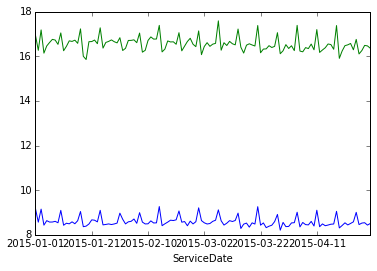

In [112]:
AvTime(4).plot()
AvTime(3).plot()

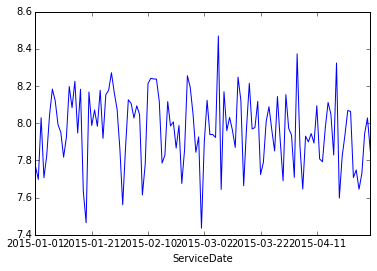

In [113]:
(AvTime(3)-AvTime(4)).plot()